In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import wandb
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.datasets import make_blobs

from modules.dataset import Dataset
from modules.model import Net
from modules.utils.hparams_tuning import hparams_tuning
from modules.loops.main_loop import loop
from modules.utils.sweep_config import sweep_config

d:\workspace\python\classification-playground\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
blobs, blobs_labels = make_blobs(n_samples=1000, n_features=2, centers=5, random_state=202299)

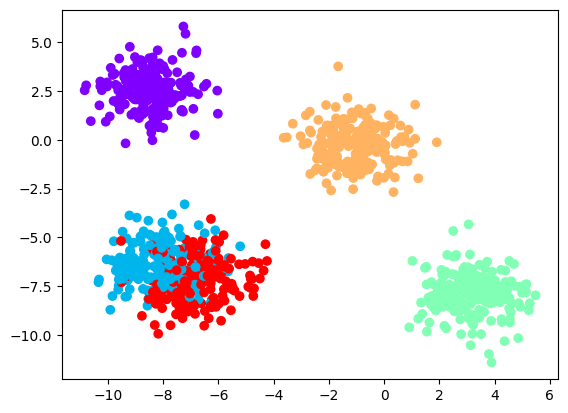

In [3]:
plt.scatter(blobs[..., 0], blobs[..., 1], c=blobs_labels, cmap='rainbow')
plt.show()

In [4]:
blobs_ds = Dataset(blobs, blobs_labels)

train_size = int(0.85 * len(blobs_ds))
valid_size = len(blobs_ds) - train_size

blobs_train, blobs_valid = torch.utils.data.random_split(blobs_ds, [train_size, valid_size])

In [5]:
PROJECT_NAME = 'classification-playground-blobs'

wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: jmisilo. Use `wandb login --relogin` to force relogin


True

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
hparams_tuning(sweep_config, nn.CrossEntropyLoss, blobs_train, val_ds=blobs_valid, project_name=PROJECT_NAME, in_features=blobs_ds.num_features, out_features=blobs_ds.num_labels, save_dir='blobs', device=device)

Create sweep with ID: oh0z6i1i
Sweep URL: https://wandb.ai/jmisilo/classification-playground-blobs-sweep/sweeps/oh0z6i1i


wandb: Agent Starting Run: mqzpp3cm with config:
wandb: 	batch_size_exp: 9
wandb: 	dropout: 0.1227456939834119
wandb: 	epochs: 37
wandb: 	k: 0.08485963465496255
wandb: 	lr: 0.1937585533185892
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


d:\workspace\python\classification-playground\venv\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")
Epoch: 0 | Loss: --- | Acc: ---:   0%|          | 0/2 [00:00<?, ?it/s]d:\workspace\python\classification-playground\venv\lib\site-packages\torch\amp\autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
Epoch: 0 | Loss: 1.678 | Acc: 6.47%: 100%|██████████| 2/2 [00:00<00:00, 38.46it/s]
Validation Loss: 1.702 | Validation Acc: 0.00%: 100%|██████████| 1/1 [00:00<00:00, 83.31it/s]
Epoch: 1 | Loss: 1.645 | Acc: 13.88%: 100%|██████████| 2/2 [00:00<00:00, 41.67it/s]
Validation Loss: 1.620 | Validation Acc: 20.67%: 100%|██████████| 1/1 [00:00<00:00, 83.39it/s]
E

lr,▁▃▆███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁
t_accuracy,▁▂▃▄▄▅▆▇▇▇███████████████████████████
t_loss,██▇▇▆▅▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▃▃▃▄▆▇▇█████████████████████████████
val_loss,██▇▆▆▅▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.0011
t_accuracy,0.88941
t_loss,0.22636
val_accuracy,0.91333
val_loss,0.19443


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: wiraqn79 with config:
wandb: 	batch_size_exp: 4
wandb: 	dropout: 0.07260373936999681
wandb: 	epochs: 50
wandb: 	k: 0.1283712147418053
wandb: 	lr: 0.14696521814755445
wandb: 	optimizer: Adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.582 | Acc: 38.82%: 100%|██████████| 54/54 [00:00<00:00, 100.93it/s]
Validation Loss: 1.609 | Validation Acc: 32.00%: 100%|██████████| 10/10 [00:00<00:00, 243.89it/s]
Epoch: 1 | Loss: 1.145 | Acc: 49.06%: 100%|██████████| 54/54 [00:00<00:00, 122.85it/s]
Validation Loss: 0.748 | Validation Acc: 69.33%: 100%|██████████| 10/10 [00:00<00:00, 227.27it/s]
Epoch: 2 | Loss: 0.452 | Acc: 78.59%: 100%|██████████| 54/54 [00:00<00:00, 137.73it/s]
Validation Loss: 0.316 | Validation Acc: 83.33%: 100%|██████████| 10/10 [00:00<00:00, 227.25it/s]
Epoch: 3 | Loss: 0.298 | Acc: 84.94%: 100%|██████████| 54/54 [00:00<00:00, 129.17it/s]
Validation Loss: 0.307 | Validation Acc: 83.33%: 100%|██████████| 10/10 [00:00<00:00, 217.40it/s]
Epoch: 4 | Loss: 0.280 | Acc: 84.82%: 100%|██████████| 54/54 [00:00<00:00, 123.55it/s]
Validation Loss: 0.217 | Validation Acc: 90.67%: 100%|██████████| 10/10 [00:00<00:00, 175.29it/s]
Epoch: 5 | Loss: 0.264 | Acc: 87.18%: 100%|██████████| 54/54 [00:00<00:00, 

lr,▁▂▃▅▇███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁
t_accuracy,▁▂▆▇▇▇▇▇██▇█████████████████████████████
t_loss,█▆▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▅▇▇█▇██████████████████████████████████
val_loss,█▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00049
t_accuracy,0.91059
t_loss,0.1901
val_accuracy,0.9
val_loss,0.21289


wandb: Agent Starting Run: t1kmqyg3 with config:
wandb: 	batch_size_exp: 5
wandb: 	dropout: 0.41727790161510897
wandb: 	epochs: 11
wandb: 	k: 0.2921041669713167
wandb: 	lr: 0.19515974538375455
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.718 | Acc: 12.00%: 100%|██████████| 27/27 [00:00<00:00, 87.38it/s]
Validation Loss: 1.644 | Validation Acc: 1.33%: 100%|██████████| 5/5 [00:00<00:00, 172.44it/s]
Epoch: 1 | Loss: 1.398 | Acc: 35.29%: 100%|██████████| 27/27 [00:00<00:00, 122.18it/s]
Validation Loss: 0.969 | Validation Acc: 54.67%: 100%|██████████| 5/5 [00:00<00:00, 200.04it/s]
Epoch: 2 | Loss: 0.778 | Acc: 65.41%: 100%|██████████| 27/27 [00:00<00:00, 114.89it/s]
Validation Loss: 0.323 | Validation Acc: 82.00%: 100%|██████████| 5/5 [00:00<00:00, 227.29it/s]
Epoch: 3 | Loss: 0.556 | Acc: 69.76%: 100%|██████████| 27/27 [00:00<00:00, 107.77it/s]
Validation Loss: 0.286 | Validation Acc: 82.00%: 100%|██████████| 5/5 [00:00<00:00, 192.23it/s]
Epoch: 4 | Loss: 0.473 | Acc: 74.47%: 100%|██████████| 27/27 [00:00<00:00, 103.64it/s]
Validation Loss: 0.283 | Validation Acc: 85.33%: 100%|██████████| 5/5 [00:00<00:00, 151.52it/s]
Epoch: 5 | Loss: 0.441 | Acc: 76.71%: 100%|██████████| 27/27 [00:00<00:00, 107.57it/s]


lr,▁▃▆█▇▆▅▅▄▃▂
t_accuracy,▁▃▆▇▇▇▇▇███
t_loss,█▆▃▂▁▁▁▁▁▁▁
val_accuracy,▁▅▇▇███▇▇▇█
val_loss,█▅▁▁▁▁▁▁▁▁▁
lr,0.00476
t_accuracy,0.82706
t_loss,0.3959
val_accuracy,0.91333
val_loss,0.24262


wandb: Agent Starting Run: idw264da with config:
wandb: 	batch_size_exp: 5
wandb: 	dropout: 0.35071983588164035
wandb: 	epochs: 6
wandb: 	k: 0.3979774191453393
wandb: 	lr: 0.4926354890927811
wandb: 	optimizer: SGD
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.688 | Acc: 16.82%: 100%|██████████| 27/27 [00:00<00:00, 136.38it/s]
Validation Loss: 1.638 | Validation Acc: 13.33%: 100%|██████████| 5/5 [00:00<00:00, 185.20it/s]
Epoch: 1 | Loss: 1.226 | Acc: 41.65%: 100%|██████████| 27/27 [00:00<00:00, 137.71it/s]
Validation Loss: 0.900 | Validation Acc: 54.00%: 100%|██████████| 5/5 [00:00<00:00, 200.00it/s]
Epoch: 2 | Loss: 0.834 | Acc: 62.24%: 100%|██████████| 27/27 [00:00<00:00, 119.44it/s]
Validation Loss: 0.589 | Validation Acc: 79.33%: 100%|██████████| 5/5 [00:00<00:00, 199.99it/s]
Epoch: 3 | Loss: 0.683 | Acc: 73.29%: 100%|██████████| 27/27 [00:00<00:00, 104.65it/s]
Validation Loss: 0.507 | Validation Acc: 78.67%: 100%|██████████| 5/5 [00:00<00:00, 185.19it/s]
Epoch: 4 | Loss: 0.622 | Acc: 74.59%: 100%|██████████| 27/27 [00:00<00:00, 107.12it/s]
Validation Loss: 0.482 | Validation Acc: 82.00%: 100%|██████████| 5/5 [00:00<00:00, 142.85it/s]
Epoch: 5 | Loss: 0.624 | Acc: 77.53%: 100%|██████████| 27/27 [00:00<00:00, 109.73it/s

lr,▁▅█▆▅▃
t_accuracy,▁▄▆███
t_loss,█▅▂▁▁▁
val_accuracy,▁▅████
val_loss,█▄▂▁▁▁
lr,0.06067
t_accuracy,0.77529
t_loss,0.62444
val_accuracy,0.81333
val_loss,0.44962


wandb: Agent Starting Run: wbpw26a9 with config:
wandb: 	batch_size_exp: 5
wandb: 	dropout: 0.12874238253974257
wandb: 	epochs: 47
wandb: 	k: 0.1287483595881637
wandb: 	lr: 0.13954057485796328
wandb: 	optimizer: Adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.661 | Acc: 22.71%: 100%|██████████| 27/27 [00:00<00:00, 83.85it/s]
Validation Loss: 1.699 | Validation Acc: 14.00%: 100%|██████████| 5/5 [00:00<00:00, 131.58it/s]
Epoch: 1 | Loss: 1.415 | Acc: 36.94%: 100%|██████████| 27/27 [00:00<00:00, 76.58it/s]
Validation Loss: 1.256 | Validation Acc: 40.67%: 100%|██████████| 5/5 [00:00<00:00, 238.12it/s]
Epoch: 2 | Loss: 0.879 | Acc: 59.18%: 100%|██████████| 27/27 [00:00<00:00, 102.04it/s]
Validation Loss: 0.684 | Validation Acc: 64.67%: 100%|██████████| 5/5 [00:00<00:00, 192.31it/s]
Epoch: 3 | Loss: 0.547 | Acc: 76.47%: 100%|██████████| 27/27 [00:00<00:00, 117.39it/s]
Validation Loss: 0.257 | Validation Acc: 90.00%: 100%|██████████| 5/5 [00:00<00:00, 263.14it/s]
Epoch: 4 | Loss: 0.368 | Acc: 82.71%: 100%|██████████| 27/27 [00:00<00:00, 75.21it/s] 
Validation Loss: 0.231 | Validation Acc: 90.67%: 100%|██████████| 5/5 [00:00<00:00, 33.21it/s]
Epoch: 5 | Loss: 0.314 | Acc: 84.59%: 100%|██████████| 27/27 [00:00<00:00, 96.09it/s] 
V

lr,▁▂▃▅▆▇███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁
t_accuracy,▁▂▅▇▇▇██████████████████████████████████
t_loss,█▇▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▃▆████▇████████████████████████████████
val_loss,█▆▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00047
t_accuracy,0.89176
t_loss,0.21412
val_accuracy,0.89333
val_loss,0.199


wandb: Agent Starting Run: ztagbb42 with config:
wandb: 	batch_size_exp: 8
wandb: 	dropout: 0.3039636829210411
wandb: 	epochs: 15
wandb: 	k: 0.19946886895021432
wandb: 	lr: 0.17986256630559405
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.592 | Acc: 19.65%: 100%|██████████| 4/4 [00:00<00:00, 27.21it/s]
Validation Loss: 1.635 | Validation Acc: 14.00%: 100%|██████████| 1/1 [00:00<00:00, 55.60it/s]
Epoch: 1 | Loss: 1.498 | Acc: 22.59%: 100%|██████████| 4/4 [00:00<00:00, 28.57it/s]
Validation Loss: 1.378 | Validation Acc: 31.33%: 100%|██████████| 1/1 [00:00<00:00, 55.54it/s]
Epoch: 2 | Loss: 1.186 | Acc: 47.41%: 100%|██████████| 4/4 [00:00<00:00, 35.72it/s]
Validation Loss: 0.813 | Validation Acc: 55.33%: 100%|██████████| 1/1 [00:00<00:00, 62.50it/s]
Epoch: 3 | Loss: 0.777 | Acc: 59.76%: 100%|██████████| 4/4 [00:00<00:00, 37.38it/s]
Validation Loss: 0.636 | Validation Acc: 58.00%: 100%|██████████| 1/1 [00:00<00:00, 66.68it/s]
Epoch: 4 | Loss: 0.642 | Acc: 66.59%: 100%|██████████| 4/4 [00:00<00:00, 27.78it/s]
Validation Loss: 0.497 | Validation Acc: 77.33%: 100%|██████████| 1/1 [00:00<00:00, 58.83it/s]
Epoch: 5 | Loss: 0.561 | Acc: 73.06%: 100%|██████████| 4/4 [00:00<00:00, 30.77it/s]
Validation Loss: 0.40

lr,▁▅█▇▇▆▆▅▅▄▄▃▃▂▂
t_accuracy,▁▁▄▆▆▇▇██▇█████
t_loss,█▇▆▃▃▂▂▂▁▁▁▁▁▁▁
val_accuracy,▁▃▅▅▇██▇█▇█████
val_loss,█▇▄▃▂▁▁▁▁▁▁▁▁▁▁
lr,0.00249
t_accuracy,0.79882
t_loss,0.3757
val_accuracy,0.81333
val_loss,0.31808


wandb: Agent Starting Run: csb2u6j6 with config:
wandb: 	batch_size_exp: 10
wandb: 	dropout: 0.19380701879528428
wandb: 	epochs: 40
wandb: 	k: 0.08796038295443705
wandb: 	lr: 0.23211843832333423
wandb: 	optimizer: SGD
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.685 | Acc: 20.59%: 100%|██████████| 1/1 [00:00<00:00, 24.39it/s]
Validation Loss: 1.665 | Validation Acc: 18.00%: 100%|██████████| 1/1 [00:00<00:00, 71.44it/s]
Epoch: 1 | Loss: 1.679 | Acc: 21.06%: 100%|██████████| 1/1 [00:00<00:00, 35.70it/s]
Validation Loss: 1.655 | Validation Acc: 18.00%: 100%|██████████| 1/1 [00:00<00:00, 76.87it/s]
Epoch: 2 | Loss: 1.674 | Acc: 20.00%: 100%|██████████| 1/1 [00:00<00:00, 35.72it/s]
Validation Loss: 1.637 | Validation Acc: 18.00%: 100%|██████████| 1/1 [00:00<00:00, 66.63it/s]
Epoch: 3 | Loss: 1.646 | Acc: 21.29%: 100%|██████████| 1/1 [00:00<00:00, 30.30it/s]
Validation Loss: 1.612 | Validation Acc: 18.00%: 100%|██████████| 1/1 [00:00<00:00, 62.49it/s]
Epoch: 4 | Loss: 1.627 | Acc: 21.53%: 100%|██████████| 1/1 [00:00<00:00, 24.39it/s]
Validation Loss: 1.589 | Validation Acc: 18.00%: 100%|██████████| 1/1 [00:00<00:00, 55.55it/s]
Epoch: 5 | Loss: 1.590 | Acc: 22.71%: 100%|██████████| 1/1 [00:00<00:00, 26.31it/s]
Validation Loss: 1.56

lr,▁▃▆███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁
t_accuracy,▁▁▁▁▁▂▂▂▂▃▄▄▅▅▆▆▇█▇▇▇▇▇▇██▇▇██▇▇█████▇██
t_loss,███▇▇▆▆▆▆▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁▁▁▁▁▂▃▃▄▅▆▇▇▇▇▇▇▇▇▇▇▇▇█████████████
val_loss,██▇▇▇▆▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
lr,0.00146
t_accuracy,0.53412
t_loss,1.24568
val_accuracy,0.6
val_loss,1.2782


wandb: Agent Starting Run: efdxk6c3 with config:
wandb: 	batch_size_exp: 7
wandb: 	dropout: 0.40940348556187184
wandb: 	epochs: 13
wandb: 	k: 0.28312429717793625
wandb: 	lr: 0.20240121617340567
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.639 | Acc: 20.12%: 100%|██████████| 7/7 [00:00<00:00, 42.68it/s]
Validation Loss: 1.545 | Validation Acc: 19.33%: 100%|██████████| 2/2 [00:00<00:00, 99.96it/s]
Epoch: 1 | Loss: 1.540 | Acc: 27.06%: 100%|██████████| 7/7 [00:00<00:00, 38.04it/s]
Validation Loss: 1.404 | Validation Acc: 40.67%: 100%|██████████| 2/2 [00:00<00:00, 54.05it/s]
Epoch: 2 | Loss: 1.302 | Acc: 45.76%: 100%|██████████| 7/7 [00:00<00:00, 52.15it/s]
Validation Loss: 0.911 | Validation Acc: 76.00%: 100%|██████████| 2/2 [00:00<00:00, 62.50it/s]
Epoch: 3 | Loss: 0.897 | Acc: 59.53%: 100%|██████████| 7/7 [00:00<00:00, 35.00it/s]
Validation Loss: 0.397 | Validation Acc: 81.33%: 100%|██████████| 2/2 [00:00<00:00, 50.01it/s]
Epoch: 4 | Loss: 0.666 | Acc: 66.47%: 100%|██████████| 7/7 [00:00<00:00, 41.67it/s]
Validation Loss: 0.341 | Validation Acc: 77.33%: 100%|██████████| 2/2 [00:00<00:00, 76.93it/s]
Epoch: 5 | Loss: 0.603 | Acc: 70.24%: 100%|██████████| 7/7 [00:00<00:00, 49.30it/s]
Validation Loss: 0.33

lr,▁▃▆█▇▇▆▅▅▄▃▂▂
t_accuracy,▁▂▄▆▇███▇████
t_loss,█▇▆▄▂▂▁▁▁▁▁▁▁
val_accuracy,▁▃▇█▇█▇█▇▇█▇▇
val_loss,█▇▄▂▁▁▁▁▁▁▁▁▁
lr,0.0041
t_accuracy,0.72588
t_loss,0.4616
val_accuracy,0.77333
val_loss,0.29312


wandb: Agent Starting Run: foqek6tq with config:
wandb: 	batch_size_exp: 5
wandb: 	dropout: 0.14315627151450605
wandb: 	epochs: 50
wandb: 	k: 0.17291282330985308
wandb: 	lr: 0.06851598841176601
wandb: 	optimizer: Adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.537 | Acc: 38.12%: 100%|██████████| 27/27 [00:00<00:00, 69.76it/s]
Validation Loss: 1.524 | Validation Acc: 41.33%: 100%|██████████| 5/5 [00:00<00:00, 178.56it/s]
Epoch: 1 | Loss: 1.494 | Acc: 39.41%: 100%|██████████| 27/27 [00:00<00:00, 84.38it/s]
Validation Loss: 1.438 | Validation Acc: 41.33%: 100%|██████████| 5/5 [00:00<00:00, 166.69it/s]
Epoch: 2 | Loss: 1.358 | Acc: 38.82%: 100%|██████████| 27/27 [00:00<00:00, 109.05it/s]
Validation Loss: 1.228 | Validation Acc: 45.33%: 100%|██████████| 5/5 [00:00<00:00, 217.39it/s]
Epoch: 3 | Loss: 1.133 | Acc: 44.12%: 100%|██████████| 27/27 [00:00<00:00, 83.45it/s] 
Validation Loss: 0.967 | Validation Acc: 49.33%: 100%|██████████| 5/5 [00:00<00:00, 108.71it/s]
Epoch: 4 | Loss: 0.861 | Acc: 60.82%: 100%|██████████| 27/27 [00:00<00:00, 103.45it/s]
Validation Loss: 0.740 | Validation Acc: 64.67%: 100%|██████████| 5/5 [00:00<00:00, 156.22it/s]
Epoch: 5 | Loss: 0.670 | Acc: 69.06%: 100%|██████████| 27/27 [00:00<00:00, 99.17it/s] 


lr,▁▂▃▄▅▆▇██▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁
t_accuracy,▁▁▁▂▅▇▇▇▇▇███▇█▇████████████████████████
t_loss,██▇▆▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▂▂▆▇██████████████████████████████████
val_loss,██▆▅▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00011
t_accuracy,0.89294
t_loss,0.23817
val_accuracy,0.91333
val_loss,0.20473


wandb: Agent Starting Run: ho70wuqo with config:
wandb: 	batch_size_exp: 4
wandb: 	dropout: 0.12804399785247533
wandb: 	epochs: 45
wandb: 	k: 0.25289696087683283
wandb: 	lr: 0.08486319554722216
wandb: 	optimizer: Adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.624 | Acc: 24.82%: 100%|██████████| 54/54 [00:00<00:00, 130.75it/s]
Validation Loss: 1.612 | Validation Acc: 35.33%: 100%|██████████| 10/10 [00:00<00:00, 117.53it/s]
Epoch: 1 | Loss: 1.579 | Acc: 33.41%: 100%|██████████| 54/54 [00:00<00:00, 100.19it/s]
Validation Loss: 1.530 | Validation Acc: 53.33%: 100%|██████████| 10/10 [00:00<00:00, 217.37it/s]
Epoch: 2 | Loss: 1.264 | Acc: 65.06%: 100%|██████████| 54/54 [00:00<00:00, 119.99it/s]
Validation Loss: 1.045 | Validation Acc: 70.00%: 100%|██████████| 10/10 [00:00<00:00, 166.68it/s]
Epoch: 3 | Loss: 0.701 | Acc: 73.76%: 100%|██████████| 54/54 [00:00<00:00, 117.89it/s]
Validation Loss: 0.641 | Validation Acc: 78.00%: 100%|██████████| 10/10 [00:00<00:00, 192.28it/s]
Epoch: 4 | Loss: 0.489 | Acc: 82.00%: 100%|██████████| 54/54 [00:00<00:00, 112.50it/s]
Validation Loss: 0.405 | Validation Acc: 90.67%: 100%|██████████| 10/10 [00:00<00:00, 194.06it/s]
Epoch: 5 | Loss: 0.343 | Acc: 87.06%: 100%|██████████| 54/54 [00:00<00:00, 

lr,▁▂▂▃▄▄▅▅▇▇███▇▇▇▇▆▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▁
t_accuracy,▁▂▅▆▇███████████████████████████████████
t_loss,██▆▃▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▃▅▆████████████████████████████████████
val_loss,██▅▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00021
t_accuracy,0.90706
t_loss,0.20574
val_accuracy,0.90667
val_loss,0.20621


wandb: Agent Starting Run: 18dhi83d with config:
wandb: 	batch_size_exp: 4
wandb: 	dropout: 0.4129278565706589
wandb: 	epochs: 12
wandb: 	k: 0.24455117196696177
wandb: 	lr: 0.1908814479970831
wandb: 	optimizer: SGD
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.984 | Acc: 18.59%: 100%|██████████| 54/54 [00:00<00:00, 111.11it/s]
Validation Loss: 1.804 | Validation Acc: 24.00%: 100%|██████████| 10/10 [00:00<00:00, 175.43it/s]
Epoch: 1 | Loss: 1.495 | Acc: 28.24%: 100%|██████████| 54/54 [00:00<00:00, 88.16it/s] 
Validation Loss: 1.209 | Validation Acc: 58.67%: 100%|██████████| 10/10 [00:00<00:00, 208.32it/s]
Epoch: 2 | Loss: 1.114 | Acc: 55.06%: 100%|██████████| 54/54 [00:00<00:00, 125.00it/s]
Validation Loss: 0.836 | Validation Acc: 88.67%: 100%|██████████| 10/10 [00:00<00:00, 222.23it/s]
Epoch: 3 | Loss: 0.861 | Acc: 67.53%: 100%|██████████| 54/54 [00:00<00:00, 128.52it/s]
Validation Loss: 0.662 | Validation Acc: 87.33%: 100%|██████████| 10/10 [00:00<00:00, 192.30it/s]
Epoch: 4 | Loss: 0.793 | Acc: 65.18%: 100%|██████████| 54/54 [00:00<00:00, 133.64it/s]
Validation Loss: 0.599 | Validation Acc: 84.00%: 100%|██████████| 10/10 [00:00<00:00, 143.67it/s]
Epoch: 5 | Loss: 0.737 | Acc: 69.53%: 100%|██████████| 54/54 [00:00<00:00, 

lr,▁▅█▇▇▆▅▅▄▃▂▂
t_accuracy,▁▂▆▇▇▇█▇████
t_loss,█▅▄▂▂▂▁▁▁▁▁▁
val_accuracy,▁▅██▇███████
val_loss,█▅▃▂▂▁▁▁▁▁▁▁
lr,0.00364
t_accuracy,0.74235
t_loss,0.61927
val_accuracy,0.88
val_loss,0.48335


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: xrpm5l8o with config:
wandb: 	batch_size_exp: 4
wandb: 	dropout: 0.12977980375467407
wandb: 	epochs: 50
wandb: 	k: 0.20468009156645955
wandb: 	lr: 0.06009044234031092
wandb: 	optimizer: Adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.617 | Acc: 31.76%: 100%|██████████| 54/54 [00:00<00:00, 112.48it/s]
Validation Loss: 1.661 | Validation Acc: 25.33%: 100%|██████████| 10/10 [00:00<00:00, 188.34it/s]
Epoch: 1 | Loss: 1.586 | Acc: 38.71%: 100%|██████████| 54/54 [00:00<00:00, 108.74it/s]
Validation Loss: 1.605 | Validation Acc: 32.67%: 100%|██████████| 10/10 [00:00<00:00, 192.31it/s]
Epoch: 2 | Loss: 1.456 | Acc: 51.18%: 100%|██████████| 54/54 [00:00<00:00, 105.15it/s]
Validation Loss: 1.353 | Validation Acc: 55.33%: 100%|██████████| 10/10 [00:00<00:00, 185.20it/s]
Epoch: 3 | Loss: 1.117 | Acc: 57.06%: 100%|██████████| 54/54 [00:00<00:00, 104.94it/s]
Validation Loss: 0.963 | Validation Acc: 51.33%: 100%|██████████| 10/10 [00:00<00:00, 208.34it/s]
Epoch: 4 | Loss: 0.765 | Acc: 62.82%: 100%|██████████| 54/54 [00:00<00:00, 91.67it/s] 
Validation Loss: 0.693 | Validation Acc: 63.33%: 100%|██████████| 10/10 [00:00<00:00, 163.93it/s]
Epoch: 5 | Loss: 0.580 | Acc: 74.35%: 100%|██████████| 54/54 [00:00<00:00, 

lr,▁▂▂▃▅▅▆▇███▇▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁
t_accuracy,▁▂▃▄▆▇▇▆▇███████████████████████████████
t_loss,██▇▆▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▂▄▄▇▇▇▇████████████████████████████████
val_loss,██▇▅▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,9e-05
t_accuracy,0.89647
t_loss,0.22407
val_accuracy,0.88667
val_loss,0.21868


wandb: Agent Starting Run: z7ns66pd with config:
wandb: 	batch_size_exp: 8
wandb: 	dropout: 0.054174849052552376
wandb: 	epochs: 37
wandb: 	k: 0.18640089538347904
wandb: 	lr: 0.1957342529066724
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.634 | Acc: 17.76%: 100%|██████████| 4/4 [00:00<00:00, 33.90it/s]
Validation Loss: 1.613 | Validation Acc: 22.67%: 100%|██████████| 1/1 [00:00<00:00, 71.43it/s]
Epoch: 1 | Loss: 1.587 | Acc: 19.06%: 100%|██████████| 4/4 [00:00<00:00, 30.77it/s]
Validation Loss: 1.509 | Validation Acc: 22.67%: 100%|██████████| 1/1 [00:00<00:00, 47.65it/s]
Epoch: 2 | Loss: 1.413 | Acc: 37.29%: 100%|██████████| 4/4 [00:00<00:00, 32.52it/s]
Validation Loss: 1.289 | Validation Acc: 55.33%: 100%|██████████| 1/1 [00:00<00:00, 45.45it/s]
Epoch: 3 | Loss: 1.088 | Acc: 59.29%: 100%|██████████| 4/4 [00:00<00:00, 31.01it/s]
Validation Loss: 0.850 | Validation Acc: 55.33%: 100%|██████████| 1/1 [00:00<00:00, 66.67it/s]
Epoch: 4 | Loss: 0.686 | Acc: 61.18%: 100%|██████████| 4/4 [00:00<00:00, 26.85it/s]
Validation Loss: 0.704 | Validation Acc: 58.00%: 100%|██████████| 1/1 [00:00<00:00, 30.30it/s]
Epoch: 5 | Loss: 0.582 | Acc: 68.35%: 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]
Validation Loss: 0.56

lr,▁▂▃▅▆▇███▇▇▇▇▆▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁
t_accuracy,▁▁▃▅▅▆▆▇▇▇███████████████████████████
t_loss,██▇▅▃▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▄▄▅▆▇▆█▇▇██████████████████████████
val_loss,█▇▆▄▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00124
t_accuracy,0.90471
t_loss,0.21015
val_accuracy,0.91333
val_loss,0.19374


wandb: Agent Starting Run: fq3xv7ul with config:
wandb: 	batch_size_exp: 8
wandb: 	dropout: 0.06192436870801071
wandb: 	epochs: 38
wandb: 	k: 0.18172708305770183
wandb: 	lr: 0.07933305969232217
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.608 | Acc: 22.12%: 100%|██████████| 4/4 [00:00<00:00, 33.90it/s]
Validation Loss: 1.656 | Validation Acc: 18.67%: 100%|██████████| 1/1 [00:00<00:00, 55.57it/s]
Epoch: 1 | Loss: 1.603 | Acc: 22.12%: 100%|██████████| 4/4 [00:00<00:00, 31.49it/s]
Validation Loss: 1.639 | Validation Acc: 18.67%: 100%|██████████| 1/1 [00:00<00:00, 11.49it/s]
Epoch: 2 | Loss: 1.585 | Acc: 28.59%: 100%|██████████| 4/4 [00:00<00:00, 26.06it/s]
Validation Loss: 1.606 | Validation Acc: 32.67%: 100%|██████████| 1/1 [00:00<00:00, 62.53it/s]
Epoch: 3 | Loss: 1.544 | Acc: 39.65%: 100%|██████████| 4/4 [00:00<00:00, 31.25it/s]
Validation Loss: 1.553 | Validation Acc: 32.67%: 100%|██████████| 1/1 [00:00<00:00, 66.65it/s]
Epoch: 4 | Loss: 1.486 | Acc: 44.24%: 100%|██████████| 4/4 [00:00<00:00, 35.09it/s]
Validation Loss: 1.473 | Validation Acc: 45.33%: 100%|██████████| 1/1 [00:00<00:00, 52.63it/s]
Epoch: 5 | Loss: 1.396 | Acc: 55.65%: 100%|██████████| 4/4 [00:00<00:00, 27.59it/s]
Validation Loss: 1.36

lr,▁▂▃▅▆▇███▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁
t_accuracy,▁▁▂▃▃▄▄▄▅▆▆▇▇▇▇███████████████████████
t_loss,████▇▇▆▆▅▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▂▂▄▄▄▅▅▅▆▆▇▇████████████████████████
val_loss,████▇▇▆▅▅▄▄▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.0002
t_accuracy,0.88118
t_loss,0.24627
val_accuracy,0.90667
val_loss,0.21122


wandb: Agent Starting Run: u9rdfvmk with config:
wandb: 	batch_size_exp: 8
wandb: 	dropout: 0.09066460032753136
wandb: 	epochs: 35
wandb: 	k: 0.19360587272425445
wandb: 	lr: 0.1451099091614559
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.659 | Acc: 21.65%: 100%|██████████| 4/4 [00:00<00:00, 47.62it/s]
Validation Loss: 1.662 | Validation Acc: 26.67%: 100%|██████████| 1/1 [00:00<00:00, 76.92it/s]
Epoch: 1 | Loss: 1.636 | Acc: 24.35%: 100%|██████████| 4/4 [00:00<00:00, 50.00it/s]
Validation Loss: 1.599 | Validation Acc: 44.00%: 100%|██████████| 1/1 [00:00<00:00, 62.45it/s]
Epoch: 2 | Loss: 1.532 | Acc: 32.00%: 100%|██████████| 4/4 [00:00<00:00, 46.51it/s]
Validation Loss: 1.441 | Validation Acc: 43.33%: 100%|██████████| 1/1 [00:00<00:00, 71.43it/s]
Epoch: 3 | Loss: 1.336 | Acc: 44.47%: 100%|██████████| 4/4 [00:00<00:00, 42.55it/s]
Validation Loss: 1.157 | Validation Acc: 51.33%: 100%|██████████| 1/1 [00:00<00:00, 66.68it/s]
Epoch: 4 | Loss: 1.078 | Acc: 57.18%: 100%|██████████| 4/4 [00:00<00:00, 44.45it/s]
Validation Loss: 0.915 | Validation Acc: 70.67%: 100%|██████████| 1/1 [00:00<00:00, 71.40it/s]
Epoch: 5 | Loss: 0.863 | Acc: 71.41%: 100%|██████████| 4/4 [00:00<00:00, 48.19it/s]
Validation Loss: 0.76

lr,▁▂▃▅▆▇███▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
t_accuracy,▁▁▂▃▅▆▇▇▇▇█████████████████████████
t_loss,██▇▆▅▄▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▃▃▄▆▆▆▇▇▇█████████████████████████
val_loss,██▇▆▄▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00073
t_accuracy,0.89529
t_loss,0.21499
val_accuracy,0.9
val_loss,0.19788


wandb: Agent Starting Run: rcng93cw with config:
wandb: 	batch_size_exp: 8
wandb: 	dropout: 0.12437271875229831
wandb: 	epochs: 40
wandb: 	k: 0.11254829722251462
wandb: 	lr: 0.1532757600024117
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.622 | Acc: 20.35%: 100%|██████████| 4/4 [00:00<00:00, 44.44it/s]
Validation Loss: 1.617 | Validation Acc: 18.00%: 100%|██████████| 1/1 [00:00<00:00, 55.52it/s]
Epoch: 1 | Loss: 1.596 | Acc: 20.35%: 100%|██████████| 4/4 [00:00<00:00, 44.45it/s]
Validation Loss: 1.540 | Validation Acc: 18.00%: 100%|██████████| 1/1 [00:00<00:00, 71.36it/s]
Epoch: 2 | Loss: 1.467 | Acc: 30.24%: 100%|██████████| 4/4 [00:00<00:00, 42.10it/s]
Validation Loss: 1.329 | Validation Acc: 50.67%: 100%|██████████| 1/1 [00:00<00:00, 71.38it/s]
Epoch: 3 | Loss: 1.133 | Acc: 65.29%: 100%|██████████| 4/4 [00:00<00:00, 43.96it/s]
Validation Loss: 0.976 | Validation Acc: 67.33%: 100%|██████████| 1/1 [00:00<00:00, 76.90it/s]
Epoch: 4 | Loss: 0.838 | Acc: 66.00%: 100%|██████████| 4/4 [00:00<00:00, 41.66it/s]
Validation Loss: 0.696 | Validation Acc: 65.33%: 100%|██████████| 1/1 [00:00<00:00, 76.94it/s]
Epoch: 5 | Loss: 0.598 | Acc: 73.18%: 100%|██████████| 4/4 [00:00<00:00, 45.45it/s]
Validation Loss: 0.49

lr,▁▃▅▆███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁
t_accuracy,▁▁▂▆▆▆▇▇████████████████████████████████
t_loss,██▇▆▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▄▆▅▆█▇████████████████████████████████
val_loss,██▇▅▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00065
t_accuracy,0.89765
t_loss,0.21948
val_accuracy,0.91333
val_loss,0.19665


wandb: Agent Starting Run: y90re6yv with config:
wandb: 	batch_size_exp: 10
wandb: 	dropout: 0.019780290465725103
wandb: 	epochs: 40
wandb: 	k: 0.08955342996532574
wandb: 	lr: 0.1007061862550624
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.668 | Acc: 6.47%: 100%|██████████| 1/1 [00:00<00:00, 16.67it/s]
Validation Loss: 1.679 | Validation Acc: 3.33%: 100%|██████████| 1/1 [00:00<00:00, 52.63it/s]
Epoch: 1 | Loss: 1.672 | Acc: 5.06%: 100%|██████████| 1/1 [00:00<00:00, 20.00it/s]
Validation Loss: 1.661 | Validation Acc: 7.33%: 100%|██████████| 1/1 [00:00<00:00, 47.62it/s]
Epoch: 2 | Loss: 1.650 | Acc: 10.71%: 100%|██████████| 1/1 [00:00<00:00, 17.86it/s]
Validation Loss: 1.629 | Validation Acc: 36.00%: 100%|██████████| 1/1 [00:00<00:00, 49.99it/s]
Epoch: 3 | Loss: 1.611 | Acc: 31.18%: 100%|██████████| 1/1 [00:00<00:00, 25.00it/s]
Validation Loss: 1.587 | Validation Acc: 41.33%: 100%|██████████| 1/1 [00:00<00:00, 50.01it/s]
Epoch: 4 | Loss: 1.559 | Acc: 40.82%: 100%|██████████| 1/1 [00:00<00:00, 18.18it/s]
Validation Loss: 1.548 | Validation Acc: 55.33%: 100%|██████████| 1/1 [00:00<00:00, 47.61it/s]
Epoch: 5 | Loss: 1.513 | Acc: 58.00%: 100%|██████████| 1/1 [00:00<00:00, 17.55it/s]
Validation Loss: 1.510 | 

lr,▁▃▆███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁
t_accuracy,▁▁▂▄▅▇▇▇██▇▇▇▇▇▇▇▇▇▇▇▇▇▇████████████████
t_loss,████▇▇▇▆▆▆▅▅▅▄▄▄▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▅▅▇▇▇██▇▇▇▇▆▆▆▆▆▆▇▇▇▇▇████████████████
val_loss,███▇▇▇▇▆▆▆▅▅▅▄▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00027
t_accuracy,0.68941
t_loss,0.57481
val_accuracy,0.63333
val_loss,0.67658


wandb: Agent Starting Run: s3xjr52v with config:
wandb: 	batch_size_exp: 6
wandb: 	dropout: 0.08434962796765277
wandb: 	epochs: 35
wandb: 	k: 0.1007581138010312
wandb: 	lr: 0.09727042417533452
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.635 | Acc: 20.24%: 100%|██████████| 14/14 [00:00<00:00, 87.21it/s]
Validation Loss: 1.630 | Validation Acc: 18.67%: 100%|██████████| 3/3 [00:00<00:00, 149.98it/s]
Epoch: 1 | Loss: 1.576 | Acc: 21.06%: 100%|██████████| 14/14 [00:00<00:00, 81.81it/s]
Validation Loss: 1.505 | Validation Acc: 33.33%: 100%|██████████| 3/3 [00:00<00:00, 142.82it/s]
Epoch: 2 | Loss: 1.245 | Acc: 46.35%: 100%|██████████| 14/14 [00:00<00:00, 90.33it/s]
Validation Loss: 0.928 | Validation Acc: 58.00%: 100%|██████████| 3/3 [00:00<00:00, 187.58it/s]
Epoch: 3 | Loss: 0.660 | Acc: 71.29%: 100%|██████████| 14/14 [00:00<00:00, 95.24it/s]
Validation Loss: 0.483 | Validation Acc: 86.67%: 100%|██████████| 3/3 [00:00<00:00, 107.12it/s]
Epoch: 4 | Loss: 0.401 | Acc: 83.41%: 100%|██████████| 14/14 [00:00<00:00, 76.24it/s]
Validation Loss: 0.281 | Validation Acc: 88.67%: 100%|██████████| 3/3 [00:00<00:00, 96.70it/s]
Epoch: 5 | Loss: 0.324 | Acc: 86.12%: 100%|██████████| 14/14 [00:00<00:00, 70.71it/s]
Valid

lr,▁▃▆███▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁
t_accuracy,▁▁▄▆▇▇█████████████████████████████
t_loss,██▆▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▂▅████████████████████████████████
val_loss,█▇▅▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.0003
t_accuracy,0.89294
t_loss,0.20666
val_accuracy,0.90667
val_loss,0.20032


wandb: Agent Starting Run: mavxadp0 with config:
wandb: 	batch_size_exp: 6
wandb: 	dropout: 0.05770265269757152
wandb: 	epochs: 47
wandb: 	k: 0.2503079961120559
wandb: 	lr: 0.04925202141094589
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.630 | Acc: 19.41%: 100%|██████████| 14/14 [00:00<00:00, 61.95it/s]
Validation Loss: 1.611 | Validation Acc: 18.00%: 100%|██████████| 3/3 [00:00<00:00, 111.06it/s]
Epoch: 1 | Loss: 1.630 | Acc: 18.24%: 100%|██████████| 14/14 [00:00<00:00, 82.77it/s]
Validation Loss: 1.597 | Validation Acc: 20.00%: 100%|██████████| 3/3 [00:00<00:00, 166.71it/s]
Epoch: 2 | Loss: 1.601 | Acc: 22.00%: 100%|██████████| 14/14 [00:00<00:00, 63.93it/s]
Validation Loss: 1.569 | Validation Acc: 22.67%: 100%|██████████| 3/3 [00:00<00:00, 125.04it/s]
Epoch: 3 | Loss: 1.560 | Acc: 23.06%: 100%|██████████| 14/14 [00:00<00:00, 83.83it/s]
Validation Loss: 1.528 | Validation Acc: 25.33%: 100%|██████████| 3/3 [00:00<00:00, 107.14it/s]
Epoch: 4 | Loss: 1.506 | Acc: 24.00%: 100%|██████████| 14/14 [00:00<00:00, 59.57it/s]
Validation Loss: 1.465 | Validation Acc: 32.00%: 100%|██████████| 3/3 [00:00<00:00, 47.62it/s]
Epoch: 5 | Loss: 1.413 | Acc: 47.88%: 100%|██████████| 14/14 [00:00<00:00, 70.00it/s]
Valid

lr,▁▂▂▃▄▄▅▆▇▇██▇▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▁
t_accuracy,▁▁▁▁▂▄▅▅▆▆▇▇████████████████████████████
t_loss,████▇▇▅▄▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▂▂▅▅▅▅▆▇▇████████████████████████████
val_loss,████▇▇▅▅▄▄▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,7e-05
t_accuracy,0.90471
t_loss,0.25031
val_accuracy,0.91333
val_loss,0.25735


wandb: Agent Starting Run: 3ggo0f5d with config:
wandb: 	batch_size_exp: 8
wandb: 	dropout: 0.15348396603021502
wandb: 	epochs: 37
wandb: 	k: 0.08978007698145996
wandb: 	lr: 0.1204740051516962
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.668 | Acc: 18.59%: 100%|██████████| 4/4 [00:00<00:00, 23.58it/s]
Validation Loss: 1.653 | Validation Acc: 22.67%: 100%|██████████| 1/1 [00:00<00:00, 58.84it/s]
Epoch: 1 | Loss: 1.639 | Acc: 18.94%: 100%|██████████| 4/4 [00:00<00:00, 34.89it/s]
Validation Loss: 1.606 | Validation Acc: 22.67%: 100%|██████████| 1/1 [00:00<00:00, 62.51it/s]
Epoch: 2 | Loss: 1.574 | Acc: 19.88%: 100%|██████████| 4/4 [00:00<00:00, 44.94it/s]
Validation Loss: 1.511 | Validation Acc: 38.00%: 100%|██████████| 1/1 [00:00<00:00, 76.95it/s]
Epoch: 3 | Loss: 1.426 | Acc: 41.29%: 100%|██████████| 4/4 [00:00<00:00, 45.45it/s]
Validation Loss: 1.284 | Validation Acc: 55.33%: 100%|██████████| 1/1 [00:00<00:00, 83.38it/s]
Epoch: 4 | Loss: 1.163 | Acc: 55.53%: 100%|██████████| 4/4 [00:00<00:00, 47.62it/s]
Validation Loss: 1.022 | Validation Acc: 55.33%: 100%|██████████| 1/1 [00:00<00:00, 76.99it/s]
Epoch: 5 | Loss: 0.865 | Acc: 58.59%: 100%|██████████| 4/4 [00:00<00:00, 45.98it/s]
Validation Loss: 0.80

lr,▁▃▆███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁
t_accuracy,▁▁▁▃▅▅▆▆▆▇▇▇█████████████████████████
t_loss,███▇▆▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▃▄▄▄▅▅▆▇▇██████████████████████████
val_loss,██▇▆▅▄▃▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00043
t_accuracy,0.88588
t_loss,0.26457
val_accuracy,0.90667
val_loss,0.19867


wandb: Agent Starting Run: 8qryy9wp with config:
wandb: 	batch_size_exp: 6
wandb: 	dropout: 0.06764159219533966
wandb: 	epochs: 40
wandb: 	k: 0.1952044147601804
wandb: 	lr: 0.05819102536904637
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.608 | Acc: 38.24%: 100%|██████████| 14/14 [00:00<00:00, 66.04it/s]
Validation Loss: 1.575 | Validation Acc: 44.67%: 100%|██████████| 3/3 [00:00<00:00, 166.64it/s]
Epoch: 1 | Loss: 1.596 | Acc: 38.00%: 100%|██████████| 14/14 [00:00<00:00, 88.61it/s]
Validation Loss: 1.555 | Validation Acc: 44.67%: 100%|██████████| 3/3 [00:00<00:00, 187.44it/s]
Epoch: 2 | Loss: 1.561 | Acc: 37.65%: 100%|██████████| 14/14 [00:00<00:00, 90.91it/s]
Validation Loss: 1.513 | Validation Acc: 44.67%: 100%|██████████| 3/3 [00:00<00:00, 187.51it/s]
Epoch: 3 | Loss: 1.486 | Acc: 40.59%: 100%|██████████| 14/14 [00:00<00:00, 102.19it/s]
Validation Loss: 1.428 | Validation Acc: 50.67%: 100%|██████████| 3/3 [00:00<00:00, 157.85it/s]
Epoch: 4 | Loss: 1.329 | Acc: 62.24%: 100%|██████████| 14/14 [00:00<00:00, 95.24it/s]
Validation Loss: 1.250 | Validation Acc: 69.33%: 100%|██████████| 3/3 [00:00<00:00, 150.00it/s]
Epoch: 5 | Loss: 1.073 | Acc: 65.41%: 100%|██████████| 14/14 [00:00<00:00, 101.45it/s]
Va

lr,▁▂▃▄▅▆▇███▇▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁
t_accuracy,▁▁▁▁▄▅▅▆▇▇▇█████████████████████████████
t_loss,███▇▇▅▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▂▅▄▇▇▇██████▇████████████████████████
val_loss,███▇▆▅▄▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.0001
t_accuracy,0.89294
t_loss,0.23311
val_accuracy,0.90667
val_loss,0.20346


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 49od4qgw with config:
wandb: 	batch_size_exp: 3
wandb: 	dropout: 0.3884071642053063
wandb: 	epochs: 14
wandb: 	k: 0.29696118282481854
wandb: 	lr: 0.20629415888684283
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.571 | Acc: 28.82%: 100%|██████████| 107/107 [00:01<00:00, 91.95it/s]
Validation Loss: 1.492 | Validation Acc: 42.67%: 100%|██████████| 19/19 [00:00<00:00, 123.37it/s]
Epoch: 1 | Loss: 0.899 | Acc: 59.29%: 100%|██████████| 107/107 [00:01<00:00, 95.56it/s] 
Validation Loss: 0.302 | Validation Acc: 86.00%: 100%|██████████| 19/19 [00:00<00:00, 234.56it/s]
Epoch: 2 | Loss: 0.507 | Acc: 75.53%: 100%|██████████| 107/107 [00:01<00:00, 103.71it/s]
Validation Loss: 0.261 | Validation Acc: 84.67%: 100%|██████████| 19/19 [00:00<00:00, 226.19it/s]
Epoch: 3 | Loss: 0.505 | Acc: 76.35%: 100%|██████████| 107/107 [00:01<00:00, 93.90it/s]
Validation Loss: 0.248 | Validation Acc: 90.00%: 100%|██████████| 19/19 [00:00<00:00, 179.25it/s]
Epoch: 4 | Loss: 0.475 | Acc: 76.94%: 100%|██████████| 107/107 [00:01<00:00, 89.69it/s]
Validation Loss: 0.294 | Validation Acc: 82.00%: 100%|██████████| 19/19 [00:00<00:00, 197.91it/s]
Epoch: 5 | Loss: 0.473 | Acc: 76.71%: 100%|██████████| 107/107 [00:0

lr,▁▃▅▆█▇▇▆▅▅▄▃▂▂
t_accuracy,▁▅▇▇▇▇▇▇▇▇████
t_loss,█▄▂▂▂▂▂▂▁▁▁▁▁▁
val_accuracy,▁▇▇█▇▇▆▆▆▇█▇▇█
val_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00426
t_accuracy,0.81647
t_loss,0.33591
val_accuracy,0.90667
val_loss,0.25178


wandb: Agent Starting Run: f3rjfa9c with config:
wandb: 	batch_size_exp: 7
wandb: 	dropout: 0.13273754039630975
wandb: 	epochs: 38
wandb: 	k: 0.22074819094228235
wandb: 	lr: 0.10170855066567504
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.598 | Acc: 10.82%: 100%|██████████| 7/7 [00:00<00:00, 77.78it/s]
Validation Loss: 1.584 | Validation Acc: 3.33%: 100%|██████████| 2/2 [00:00<00:00, 111.10it/s]
Epoch: 1 | Loss: 1.572 | Acc: 17.88%: 100%|██████████| 7/7 [00:00<00:00, 83.34it/s]
Validation Loss: 1.520 | Validation Acc: 34.67%: 100%|██████████| 2/2 [00:00<00:00, 99.97it/s]
Epoch: 2 | Loss: 1.468 | Acc: 46.24%: 100%|██████████| 7/7 [00:00<00:00, 70.00it/s]
Validation Loss: 1.403 | Validation Acc: 49.33%: 100%|██████████| 2/2 [00:00<00:00, 125.02it/s]
Epoch: 3 | Loss: 1.305 | Acc: 58.47%: 100%|██████████| 7/7 [00:00<00:00, 52.24it/s]
Validation Loss: 1.197 | Validation Acc: 50.67%: 100%|██████████| 2/2 [00:00<00:00, 95.26it/s]
Epoch: 4 | Loss: 1.031 | Acc: 61.53%: 100%|██████████| 7/7 [00:00<00:00, 80.45it/s]
Validation Loss: 0.898 | Validation Acc: 56.67%: 100%|██████████| 2/2 [00:00<00:00, 111.13it/s]
Epoch: 5 | Loss: 0.749 | Acc: 63.65%: 100%|██████████| 7/7 [00:00<00:00, 84.33it/s]
Validation Loss: 0.

lr,▁▂▃▄▅▅▆▇███▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
t_accuracy,▁▂▄▅▆▆▆▆▇▇████████████████████████████
t_loss,██▇▆▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▃▅▅▅▆▆▇▇█████████████████████████████
val_loss,██▇▆▅▄▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00034
t_accuracy,0.88235
t_loss,0.26255
val_accuracy,0.9
val_loss,0.20863


wandb: Agent Starting Run: 1xgkwvnz with config:
wandb: 	batch_size_exp: 6
wandb: 	dropout: 0.06857697598328977
wandb: 	epochs: 39
wandb: 	k: 0.2659669015882727
wandb: 	lr: 0.1635213587904026
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.619 | Acc: 12.94%: 100%|██████████| 14/14 [00:00<00:00, 117.65it/s]
Validation Loss: 1.616 | Validation Acc: 16.00%: 100%|██████████| 3/3 [00:00<00:00, 230.69it/s]
Epoch: 1 | Loss: 1.568 | Acc: 36.71%: 100%|██████████| 14/14 [00:00<00:00, 109.38it/s]
Validation Loss: 1.515 | Validation Acc: 45.33%: 100%|██████████| 3/3 [00:00<00:00, 200.01it/s]
Epoch: 2 | Loss: 1.325 | Acc: 55.18%: 100%|██████████| 14/14 [00:00<00:00, 97.90it/s] 
Validation Loss: 1.124 | Validation Acc: 60.67%: 100%|██████████| 3/3 [00:00<00:00, 199.98it/s]
Epoch: 3 | Loss: 0.746 | Acc: 68.94%: 100%|██████████| 14/14 [00:00<00:00, 111.12it/s]
Validation Loss: 0.573 | Validation Acc: 74.67%: 100%|██████████| 3/3 [00:00<00:00, 130.45it/s]
Epoch: 4 | Loss: 0.440 | Acc: 80.47%: 100%|██████████| 14/14 [00:00<00:00, 103.71it/s]
Validation Loss: 0.334 | Validation Acc: 87.33%: 100%|██████████| 3/3 [00:00<00:00, 111.05it/s]
Epoch: 5 | Loss: 0.310 | Acc: 85.76%: 100%|██████████| 14/14 [00:00<00:00, 79.11it/s]

lr,▁▂▂▃▄▅▅▆▇▇███▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
t_accuracy,▁▃▅▆▇██████████████████████████████████
t_loss,██▇▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▄▅▆███████████████████████████████████
val_loss,██▆▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00092
t_accuracy,0.89176
t_loss,0.20192
val_accuracy,0.9
val_loss,0.19286


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ggpsrmx9 with config:
wandb: 	batch_size_exp: 9
wandb: 	dropout: 0.20938395188027345
wandb: 	epochs: 38
wandb: 	k: 0.11453744234800108
wandb: 	lr: 0.2262130014052049
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.568 | Acc: 33.88%: 100%|██████████| 2/2 [00:00<00:00, 42.55it/s]
Validation Loss: 1.512 | Validation Acc: 41.33%: 100%|██████████| 1/1 [00:00<00:00, 71.42it/s]
Epoch: 1 | Loss: 1.523 | Acc: 39.88%: 100%|██████████| 2/2 [00:00<00:00, 39.21it/s]
Validation Loss: 1.343 | Validation Acc: 62.67%: 100%|██████████| 1/1 [00:00<00:00, 71.42it/s]
Epoch: 2 | Loss: 1.351 | Acc: 45.18%: 100%|██████████| 2/2 [00:00<00:00, 40.82it/s]
Validation Loss: 1.078 | Validation Acc: 62.00%: 100%|██████████| 1/1 [00:00<00:00, 90.86it/s]
Epoch: 3 | Loss: 1.085 | Acc: 47.88%: 100%|██████████| 2/2 [00:00<00:00, 41.67it/s]
Validation Loss: 0.832 | Validation Acc: 61.33%: 100%|██████████| 1/1 [00:00<00:00, 71.44it/s]
Epoch: 4 | Loss: 0.861 | Acc: 60.47%: 100%|██████████| 2/2 [00:00<00:00, 44.45it/s]
Validation Loss: 0.710 | Validation Acc: 67.33%: 100%|██████████| 1/1 [00:00<00:00, 90.96it/s]
Epoch: 5 | Loss: 0.749 | Acc: 62.12%: 100%|██████████| 2/2 [00:00<00:00, 26.32it/s]
Validation Loss: 0.65

lr,▁▃▅▆███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁
t_accuracy,▁▂▂▃▄▅▅▆▆▆▇▇▇▇▇▇▇▇█▇███▇██████████████
t_loss,██▇▅▄▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▄▄▄▅▅▅▇▆▇▇▇█▇████████████████████████
val_loss,█▇▆▄▄▃▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00151
t_accuracy,0.86353
t_loss,0.31041
val_accuracy,0.89333
val_loss,0.24164


wandb: Agent Starting Run: 6s7mgpyl with config:
wandb: 	batch_size_exp: 7
wandb: 	dropout: 0.16289262555708334
wandb: 	epochs: 44
wandb: 	k: 0.2675362697787817
wandb: 	lr: 0.01673340963580384
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.946 | Acc: 3.53%: 100%|██████████| 7/7 [00:00<00:00, 102.96it/s]
Validation Loss: 1.894 | Validation Acc: 0.00%: 100%|██████████| 2/2 [00:00<00:00, 133.41it/s]
Epoch: 1 | Loss: 1.931 | Acc: 3.88%: 100%|██████████| 7/7 [00:00<00:00, 104.48it/s]
Validation Loss: 1.891 | Validation Acc: 0.00%: 100%|██████████| 2/2 [00:00<00:00, 142.86it/s]
Epoch: 2 | Loss: 1.938 | Acc: 4.35%: 100%|██████████| 7/7 [00:00<00:00, 67.31it/s]
Validation Loss: 1.885 | Validation Acc: 0.00%: 100%|██████████| 2/2 [00:00<00:00, 105.27it/s]
Epoch: 3 | Loss: 1.904 | Acc: 3.65%: 100%|██████████| 7/7 [00:00<00:00, 66.67it/s]
Validation Loss: 1.876 | Validation Acc: 0.00%: 100%|██████████| 2/2 [00:00<00:00, 95.19it/s]
Epoch: 4 | Loss: 1.906 | Acc: 5.18%: 100%|██████████| 7/7 [00:00<00:00, 85.37it/s]
Validation Loss: 1.864 | Validation Acc: 0.00%: 100%|██████████| 2/2 [00:00<00:00, 125.00it/s]
Epoch: 5 | Loss: 1.888 | Acc: 3.65%: 100%|██████████| 7/7 [00:00<00:00, 81.39it/s]
Validation Loss: 1.850 | V

lr,▁▂▂▃▄▄▅▅▆▇███▇▇▇▇▇▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▁
t_accuracy,▁▁▁▁▁▁▁▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▆▆▇▇▇▇▇▇▇████▇████
t_loss,███▇▇▇▇▇▆▆▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁▁▃▃▃▄▄▅▅▆▆▇███████████████████
val_loss,████▇▇▇▇▆▆▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
lr,1e-05
t_accuracy,0.46706
t_loss,1.45698
val_accuracy,0.49333
val_loss,1.48611


wandb: Agent Starting Run: e1644xtf with config:
wandb: 	batch_size_exp: 5
wandb: 	dropout: 0.001494750851943727
wandb: 	epochs: 34
wandb: 	k: 0.18727655642401797
wandb: 	lr: 0.05673855190578011
wandb: 	optimizer: SGD
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.651 | Acc: 21.06%: 100%|██████████| 27/27 [00:00<00:00, 115.88it/s]
Validation Loss: 1.672 | Validation Acc: 14.00%: 100%|██████████| 5/5 [00:00<00:00, 208.23it/s]
Epoch: 1 | Loss: 1.649 | Acc: 21.06%: 100%|██████████| 27/27 [00:00<00:00, 122.14it/s]
Validation Loss: 1.671 | Validation Acc: 14.00%: 100%|██████████| 5/5 [00:00<00:00, 217.40it/s]
Epoch: 2 | Loss: 1.647 | Acc: 21.06%: 100%|██████████| 27/27 [00:00<00:00, 125.59it/s]
Validation Loss: 1.668 | Validation Acc: 14.00%: 100%|██████████| 5/5 [00:00<00:00, 185.19it/s]
Epoch: 3 | Loss: 1.643 | Acc: 21.06%: 100%|██████████| 27/27 [00:00<00:00, 119.43it/s]
Validation Loss: 1.664 | Validation Acc: 14.00%: 100%|██████████| 5/5 [00:00<00:00, 208.35it/s]
Epoch: 4 | Loss: 1.638 | Acc: 21.06%: 100%|██████████| 27/27 [00:00<00:00, 117.90it/s]
Validation Loss: 1.660 | Validation Acc: 14.00%: 100%|██████████| 5/5 [00:00<00:00, 151.51it/s]
Epoch: 5 | Loss: 1.633 | Acc: 21.06%: 100%|██████████| 27/27 [00:00<00:00, 120.76it/s

lr,▁▂▃▅▆▇███▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁
t_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▅▇▇████
t_loss,████▇▇▇▇▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅▇▇█████
val_loss,████▇▇▇▆▆▆▆▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁
lr,0.00011
t_accuracy,0.27059
t_loss,1.49157
val_accuracy,0.22
val_loss,1.53751


wandb: Agent Starting Run: 35401h1a with config:
wandb: 	batch_size_exp: 6
wandb: 	dropout: 0.08950003605564494
wandb: 	epochs: 41
wandb: 	k: 0.11070950587037462
wandb: 	lr: 0.20453300576546304
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.617 | Acc: 37.53%: 100%|██████████| 14/14 [00:00<00:00, 76.92it/s]
Validation Loss: 1.662 | Validation Acc: 32.67%: 100%|██████████| 3/3 [00:00<00:00, 187.42it/s]
Epoch: 1 | Loss: 1.317 | Acc: 50.24%: 100%|██████████| 14/14 [00:00<00:00, 99.97it/s]
Validation Loss: 1.094 | Validation Acc: 49.33%: 100%|██████████| 3/3 [00:00<00:00, 187.49it/s]
Epoch: 2 | Loss: 0.667 | Acc: 65.53%: 100%|██████████| 14/14 [00:00<00:00, 106.06it/s]
Validation Loss: 0.366 | Validation Acc: 84.67%: 100%|██████████| 3/3 [00:00<00:00, 214.13it/s]
Epoch: 3 | Loss: 0.351 | Acc: 81.06%: 100%|██████████| 14/14 [00:00<00:00, 114.76it/s]
Validation Loss: 0.257 | Validation Acc: 84.00%: 100%|██████████| 3/3 [00:00<00:00, 136.36it/s]
Epoch: 4 | Loss: 0.305 | Acc: 82.24%: 100%|██████████| 14/14 [00:00<00:00, 111.11it/s]
Validation Loss: 0.231 | Validation Acc: 87.33%: 100%|██████████| 3/3 [00:00<00:00, 142.89it/s]
Epoch: 5 | Loss: 0.255 | Acc: 87.06%: 100%|██████████| 14/14 [00:00<00:00, 98.59it/s] 


lr,▁▃▄▆███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁
t_accuracy,▁▃▅▇▇▇██▇████▇██████████████████████████
t_loss,█▇▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▃▇▇████████████████████████████████████
val_loss,█▅▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00113
t_accuracy,0.90824
t_loss,0.20303
val_accuracy,0.9
val_loss,0.19157


wandb: Agent Starting Run: fjufba7o with config:
wandb: 	batch_size_exp: 8
wandb: 	dropout: 0.024416763793325247
wandb: 	epochs: 36
wandb: 	k: 0.17465194838297288
wandb: 	lr: 0.11514453655352368
wandb: 	optimizer: Adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.717 | Acc: 19.06%: 100%|██████████| 4/4 [00:00<00:00, 38.83it/s]
Validation Loss: 1.687 | Validation Acc: 26.67%: 100%|██████████| 1/1 [00:00<00:00, 76.94it/s]
Epoch: 1 | Loss: 1.694 | Acc: 19.18%: 100%|██████████| 4/4 [00:00<00:00, 39.60it/s]
Validation Loss: 1.612 | Validation Acc: 26.67%: 100%|██████████| 1/1 [00:00<00:00, 58.79it/s]
Epoch: 2 | Loss: 1.591 | Acc: 22.35%: 100%|██████████| 4/4 [00:00<00:00, 34.19it/s]
Validation Loss: 1.502 | Validation Acc: 34.00%: 100%|██████████| 1/1 [00:00<00:00, 62.49it/s]
Epoch: 3 | Loss: 1.477 | Acc: 44.00%: 100%|██████████| 4/4 [00:00<00:00, 36.70it/s]
Validation Loss: 1.382 | Validation Acc: 54.00%: 100%|██████████| 1/1 [00:00<00:00, 66.60it/s]
Epoch: 4 | Loss: 1.354 | Acc: 40.12%: 100%|██████████| 4/4 [00:00<00:00, 36.69it/s]
Validation Loss: 1.268 | Validation Acc: 42.00%: 100%|██████████| 1/1 [00:00<00:00, 62.51it/s]
Epoch: 5 | Loss: 1.234 | Acc: 37.88%: 100%|██████████| 4/4 [00:00<00:00, 43.02it/s]
Validation Loss: 1.15

lr,▁▂▃▅▆▇███▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
t_accuracy,▁▁▁▃▃▃▅▆▅▅▆▆▇▇▇█████████████████████
t_loss,██▇▇▆▆▅▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▂▄▃▅▆▄▄▄▅▅▇▇▇█████████████████████
val_loss,██▇▇▆▅▅▄▃▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00044
t_accuracy,0.87882
t_loss,0.23905
val_accuracy,0.91333
val_loss,0.21012


wandb: Agent Starting Run: fkuszn30 with config:
wandb: 	batch_size_exp: 7
wandb: 	dropout: 0.00559862159311636
wandb: 	epochs: 50
wandb: 	k: 0.1340550903089862
wandb: 	lr: 0.06332428950122813
wandb: 	optimizer: Adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.616 | Acc: 30.59%: 100%|██████████| 7/7 [00:00<00:00, 79.42it/s]
Validation Loss: 1.664 | Validation Acc: 22.00%: 100%|██████████| 2/2 [00:00<00:00, 111.14it/s]
Epoch: 1 | Loss: 1.606 | Acc: 32.24%: 100%|██████████| 7/7 [00:00<00:00, 86.43it/s]
Validation Loss: 1.646 | Validation Acc: 25.33%: 100%|██████████| 2/2 [00:00<00:00, 111.12it/s]
Epoch: 2 | Loss: 1.578 | Acc: 37.53%: 100%|██████████| 7/7 [00:00<00:00, 74.47it/s]
Validation Loss: 1.606 | Validation Acc: 30.00%: 100%|██████████| 2/2 [00:00<00:00, 117.59it/s]
Epoch: 3 | Loss: 1.522 | Acc: 40.94%: 100%|██████████| 7/7 [00:00<00:00, 78.66it/s]
Validation Loss: 1.534 | Validation Acc: 32.00%: 100%|██████████| 2/2 [00:00<00:00, 105.27it/s]
Epoch: 4 | Loss: 1.411 | Acc: 41.41%: 100%|██████████| 7/7 [00:00<00:00, 76.09it/s]
Validation Loss: 1.403 | Validation Acc: 32.00%: 100%|██████████| 2/2 [00:00<00:00, 100.01it/s]
Epoch: 5 | Loss: 1.225 | Acc: 41.65%: 100%|██████████| 7/7 [00:00<00:00, 65.42it/s]
Validation Loss:

lr,▁▂▃▅▇███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁
t_accuracy,▁▁▂▂▂▃▅▅▆▆▇▇████████████████████████████
t_loss,████▆▅▄▄▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▂▂▂▄▅▅▅▆▇▇▇███████████████████████████
val_loss,███▇▆▅▄▄▃▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,9e-05
t_accuracy,0.90706
t_loss,0.19647
val_accuracy,0.91333
val_loss,0.20226


wandb: Agent Starting Run: mndprsks with config:
wandb: 	batch_size_exp: 8
wandb: 	dropout: 0.026092531906727667
wandb: 	epochs: 44
wandb: 	k: 0.15349471718533553
wandb: 	lr: 0.08519064931426036
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.694 | Acc: 18.35%: 100%|██████████| 4/4 [00:00<00:00, 34.19it/s]
Validation Loss: 1.654 | Validation Acc: 22.67%: 100%|██████████| 1/1 [00:00<00:00, 55.56it/s]
Epoch: 1 | Loss: 1.667 | Acc: 19.53%: 100%|██████████| 4/4 [00:00<00:00, 28.57it/s]
Validation Loss: 1.627 | Validation Acc: 22.67%: 100%|██████████| 1/1 [00:00<00:00, 45.45it/s]
Epoch: 2 | Loss: 1.625 | Acc: 19.53%: 100%|██████████| 4/4 [00:00<00:00, 40.00it/s]
Validation Loss: 1.581 | Validation Acc: 22.67%: 100%|██████████| 1/1 [00:00<00:00, 76.92it/s]
Epoch: 3 | Loss: 1.555 | Acc: 20.71%: 100%|██████████| 4/4 [00:00<00:00, 47.06it/s]
Validation Loss: 1.522 | Validation Acc: 35.33%: 100%|██████████| 1/1 [00:00<00:00, 76.90it/s]
Epoch: 4 | Loss: 1.457 | Acc: 41.88%: 100%|██████████| 4/4 [00:00<00:00, 52.63it/s]
Validation Loss: 1.441 | Validation Acc: 32.00%: 100%|██████████| 1/1 [00:00<00:00, 76.87it/s]
Epoch: 5 | Loss: 1.330 | Acc: 40.94%: 100%|██████████| 4/4 [00:00<00:00, 49.38it/s]
Validation Loss: 1.33

lr,▁▂▃▅▆▇███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▂▂▁
t_accuracy,▁▁▁▁▃▃▃▅▅▆▇▇▇█▇█████████████████████████
t_loss,███▇▇▆▆▅▄▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▂▂▂▄▄▄▅▇▇▇███████████████████████████
val_loss,███▇▇▆▆▅▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00019
t_accuracy,0.89059
t_loss,0.23687
val_accuracy,0.9
val_loss,0.21116


wandb: Agent Starting Run: mqub0oci with config:
wandb: 	batch_size_exp: 6
wandb: 	dropout: 0.05541721003856459
wandb: 	epochs: 39
wandb: 	k: 0.17953281662337045
wandb: 	lr: 0.12451656986975106
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.450 | Acc: 31.41%: 100%|██████████| 14/14 [00:00<00:00, 115.70it/s]
Validation Loss: 1.490 | Validation Acc: 24.67%: 100%|██████████| 3/3 [00:00<00:00, 200.03it/s]
Epoch: 1 | Loss: 1.341 | Acc: 34.00%: 100%|██████████| 14/14 [00:00<00:00, 95.24it/s]
Validation Loss: 1.286 | Validation Acc: 36.00%: 100%|██████████| 3/3 [00:00<00:00, 76.94it/s]
Epoch: 2 | Loss: 1.047 | Acc: 55.06%: 100%|██████████| 14/14 [00:00<00:00, 72.16it/s]
Validation Loss: 0.969 | Validation Acc: 54.67%: 100%|██████████| 3/3 [00:00<00:00, 176.41it/s]
Epoch: 3 | Loss: 0.704 | Acc: 62.71%: 100%|██████████| 14/14 [00:00<00:00, 104.48it/s]
Validation Loss: 0.692 | Validation Acc: 60.67%: 100%|██████████| 3/3 [00:00<00:00, 142.88it/s]
Epoch: 4 | Loss: 0.521 | Acc: 75.18%: 100%|██████████| 14/14 [00:00<00:00, 104.80it/s]
Validation Loss: 0.437 | Validation Acc: 89.33%: 100%|██████████| 3/3 [00:00<00:00, 176.39it/s]
Epoch: 5 | Loss: 0.361 | Acc: 85.65%: 100%|██████████| 14/14 [00:00<00:00, 97.90it/s]
Va

lr,▁▂▃▄▅▆▇███▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁
t_accuracy,▁▁▄▅▆▇▇██▇█████████████████████████████
t_loss,█▇▆▄▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▂▄▅███████████████████████████████████
val_loss,█▇▅▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00048
t_accuracy,0.9
t_loss,0.20467
val_accuracy,0.91333
val_loss,0.19279


wandb: Agent Starting Run: pm65r25q with config:
wandb: 	batch_size_exp: 5
wandb: 	dropout: 0.023564708776810384
wandb: 	epochs: 50
wandb: 	k: 0.2287491507460289
wandb: 	lr: 0.13190694142957912
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.655 | Acc: 20.24%: 100%|██████████| 27/27 [00:00<00:00, 94.73it/s] 
Validation Loss: 1.655 | Validation Acc: 18.67%: 100%|██████████| 5/5 [00:00<00:00, 217.39it/s]
Epoch: 1 | Loss: 1.585 | Acc: 24.59%: 100%|██████████| 27/27 [00:00<00:00, 89.11it/s] 
Validation Loss: 1.527 | Validation Acc: 32.67%: 100%|██████████| 5/5 [00:00<00:00, 135.11it/s]
Epoch: 2 | Loss: 1.182 | Acc: 42.94%: 100%|██████████| 27/27 [00:00<00:00, 88.82it/s]
Validation Loss: 1.068 | Validation Acc: 46.00%: 100%|██████████| 5/5 [00:00<00:00, 192.31it/s]
Epoch: 3 | Loss: 0.719 | Acc: 63.65%: 100%|██████████| 27/27 [00:00<00:00, 124.42it/s]
Validation Loss: 0.643 | Validation Acc: 77.33%: 100%|██████████| 5/5 [00:00<00:00, 208.33it/s]
Epoch: 4 | Loss: 0.406 | Acc: 85.65%: 100%|██████████| 27/27 [00:00<00:00, 115.39it/s]
Validation Loss: 0.280 | Validation Acc: 89.33%: 100%|██████████| 5/5 [00:00<00:00, 161.26it/s]
Epoch: 5 | Loss: 0.250 | Acc: 88.24%: 100%|██████████| 27/27 [00:00<00:00, 117.39it/s]

lr,▁▂▂▃▄▅▅▆▇███▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▂▁
t_accuracy,▁▁▃▅████████████████████████████████████
t_loss,██▆▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▂▄▇███████▇████████████████████████████
val_loss,█▇▅▃▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00045
t_accuracy,0.90824
t_loss,0.18893
val_accuracy,0.90667
val_loss,0.19707


wandb: Agent Starting Run: 9gol4tzw with config:
wandb: 	batch_size_exp: 8
wandb: 	dropout: 0.04742283576104128
wandb: 	epochs: 38
wandb: 	k: 0.10496732676221628
wandb: 	lr: 0.17143686666231248
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.590 | Acc: 19.88%: 100%|██████████| 4/4 [00:00<00:00, 24.39it/s]
Validation Loss: 1.599 | Validation Acc: 18.67%: 100%|██████████| 1/1 [00:00<00:00, 83.32it/s]
Epoch: 1 | Loss: 1.526 | Acc: 20.94%: 100%|██████████| 4/4 [00:00<00:00, 45.98it/s]
Validation Loss: 1.446 | Validation Acc: 32.67%: 100%|██████████| 1/1 [00:00<00:00, 83.31it/s]
Epoch: 2 | Loss: 1.227 | Acc: 52.35%: 100%|██████████| 4/4 [00:00<00:00, 46.51it/s]
Validation Loss: 0.950 | Validation Acc: 55.33%: 100%|██████████| 1/1 [00:00<00:00, 66.69it/s]
Epoch: 3 | Loss: 0.704 | Acc: 63.76%: 100%|██████████| 4/4 [00:00<00:00, 35.09it/s]
Validation Loss: 0.696 | Validation Acc: 66.00%: 100%|██████████| 1/1 [00:00<00:00, 76.94it/s]
Epoch: 4 | Loss: 0.531 | Acc: 72.24%: 100%|██████████| 4/4 [00:00<00:00, 43.01it/s]
Validation Loss: 0.417 | Validation Acc: 79.33%: 100%|██████████| 1/1 [00:00<00:00, 71.42it/s]
Epoch: 5 | Loss: 0.417 | Acc: 79.41%: 100%|██████████| 4/4 [00:00<00:00, 45.98it/s]
Validation Loss: 0.31

lr,▁▃▆███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁
t_accuracy,▁▁▄▅▆▇▇▇▇█████████████████████████████
t_loss,██▆▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▂▅▆▇▇▇▇██████████████████████████████
val_loss,█▇▅▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00084
t_accuracy,0.89412
t_loss,0.21137
val_accuracy,0.91333
val_loss,0.19653


wandb: Agent Starting Run: zd7qsh0q with config:
wandb: 	batch_size_exp: 7
wandb: 	dropout: 0.03848127327599904
wandb: 	epochs: 37
wandb: 	k: 0.2620898000200365
wandb: 	lr: 0.15639934960230722
wandb: 	optimizer: AdamW
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch: 0 | Loss: 1.721 | Acc: 8.94%: 100%|██████████| 7/7 [00:00<00:00, 40.23it/s] 
Validation Loss: 1.729 | Validation Acc: 1.33%: 100%|██████████| 2/2 [00:00<00:00, 117.67it/s]
Epoch: 1 | Loss: 1.668 | Acc: 15.65%: 100%|██████████| 7/7 [00:00<00:00, 70.00it/s]
Validation Loss: 1.625 | Validation Acc: 14.00%: 100%|██████████| 2/2 [00:00<00:00, 117.64it/s]
Epoch: 2 | Loss: 1.530 | Acc: 37.88%: 100%|██████████| 7/7 [00:00<00:00, 70.71it/s]
Validation Loss: 1.472 | Validation Acc: 32.67%: 100%|██████████| 2/2 [00:00<00:00, 124.97it/s]
Epoch: 3 | Loss: 1.352 | Acc: 41.18%: 100%|██████████| 7/7 [00:00<00:00, 80.46it/s]
Validation Loss: 1.301 | Validation Acc: 33.33%: 100%|██████████| 2/2 [00:00<00:00, 105.27it/s]
Epoch: 4 | Loss: 1.212 | Acc: 48.59%: 100%|██████████| 7/7 [00:00<00:00, 76.92it/s]
Validation Loss: 1.164 | Validation Acc: 36.67%: 100%|██████████| 2/2 [00:00<00:00, 111.08it/s]
Epoch: 5 | Loss: 1.090 | Acc: 43.53%: 100%|██████████| 7/7 [00:00<00:00, 76.09it/s]
Validation Loss: 

lr,▁▂▃▃▄▅▆▆▇██▇▇▇▇▆▆▆▆▆▅▅▅▅▄▄▄▃▃▃▃▂▂▂▂▁▁
t_accuracy,▁▂▃▄▄▄▆▇█████████████████████████████
t_loss,██▇▆▆▅▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▂▃▃▄▅▇██████████████████████████████
val_loss,██▇▆▅▅▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,0.00087
t_accuracy,0.90235
t_loss,0.21104
val_accuracy,0.89333
val_loss,0.19889
